# Playing the Game of Life in Julia

We try to implement a Julia version of game of life. 
 
The following are the rules taken from Wikipedia:  

- Any live cell with two or three live neighbours survives.
- Any dead cell with three live neighbours becomes a live cell.
- All other live cells die in the next generation. Similarly, all other dead cells stay dead

We will keep it simple: only a `board` on which the game will be played and `start` will be implemented.  

We take `glider_gun` from *MATH50009's* lecture notes.

In [1]:
using Plots, Colors, LinearAlgebra

In [2]:
pattern₁ = [
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 1]]

pattern₂ = [
    [0, 0, 0],
    [1, 1, 1],
    [0, 0, 0]]


pattern₃ = [
    [0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0]
];


In [3]:
glider = reduce(hcat, pattern₁)'
blinker = reduce(hcat, pattern₂)'
glider_gun = reduce(hcat, pattern₃)'
glider_gun

36×9 adjoint(::Matrix{Int64}) with eltype Int64:
 0  0  0  0  1  1  0  0  0
 0  0  0  0  1  1  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 ⋮              ⋮        
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  1  1  0  0  0  0  0
 0  0  1  1  0  0  0  0  0

(36, 9)


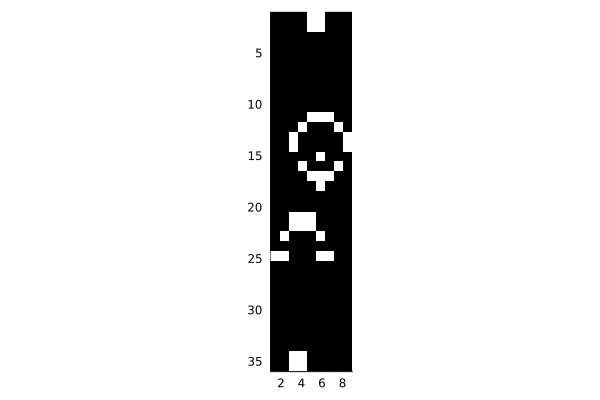

In [4]:
println(size(glider_gun))
plot(Gray.(glider_gun))

In [5]:
struct Board{T}
    V::Matrix{T}
    P::Adjoin
end

UndefVarError: UndefVarError: Adjoin not defined